In [5]:
# import sys
# sys.path.append("crnn.pytorch")
import torch
from torch.autograd import Variable
import utils
import dataset
from PIL import Image

import models.crnn as crnn

model_path = './data/crnn.pth'
img_path = './data/demo.png'
#img_path = '/home/sravya/data/muse/mydata/4.jpg'
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'

#Intial model
model = crnn.CRNN(32, 2, 37, 256)
if torch.cuda.is_available():
    model = model.cuda()
print('loading pretrained model from %s' % model_path)
model.load_state_dict(torch.load(model_path))

#Utilities
#For decoding model output
converter = utils.strLabelConverter(alphabet)
#For preprocessing the input
transformer = dataset.resizeNormalize((100, 32))


def infer(images):
    new_images = []
    for image in images:
        
        image = transformer(image.convert('L'))
        if torch.cuda.is_available():
            image = image.cuda()
        #Reshaping by adding another axis with length 1 at the beginning?
        # [1, 32, 100] -> [1, 1, 32, 100]
        image = image.view(1, *image.size())
        new_images.append(image)
    images_expanded = np.concatenate(new_images)    
    
    #Create pytorch variable and evaluate(infer) the model
    images_expanded = Variable(images_expanded)
    model.eval()
    preds = model(images_expanded)
    return preds

def process_preds(preds):
    # preds.size() = [26, 1, 37]
    #Process preds for decoding
    _, preds = preds.max(2)
    preds = preds.transpose(1, 0).contiguous().view(-1)

    #Decode
    preds_size = Variable(torch.IntTensor([preds.size(0)]))
    raw_pred = converter.decode(preds.data, preds_size.data, raw=True)
    sim_pred = converter.decode(preds.data, preds_size.data, raw=False)
    return raw_pred, sim_pred
    #print('%-20s => %-20s' % (raw_pred, sim_pred))
    
def recognize(filename,wordBBs):
    text = []
    images = []
    for bb in wordBB:
        images.append(Image.open(filename).crop(bb))

    return infer(images)

loading pretrained model from ./data/crnn.pth


RuntimeError: sizes do not match at /py/conda-bld/pytorch_1493680494901/work/torch/lib/THC/generic/THCTensorCopy.c:48

In [4]:
IMAGE_PATH = '/home/sravya/data/muse/mydata/cropped_straight_text/test_0.jpg'
image = Image.open(IMAGE_PATH)
preds = infer([image])

NameError: name 'infer' is not defined

In [15]:
IMAGE_PATH='/home/sravya/data/muse/mydata/dictmultiword/test_2.jpg'
wordBB = [ 0.00901045,  0.19503996,  0.16065617,  0.33583704]
img = Image.open(IMAGE_PATH)
width, height = img.size
ymin = wordBB[0] * height
xmin = wordBB[1] * width
ymax = wordBB[2] * height
xmax = wordBB[3] * width
new_wordBB = []
new_wordBB.append((xmin,ymin,xmax,ymax))
recognize(IMAGE_PATH, new_wordBB)

['alloye']

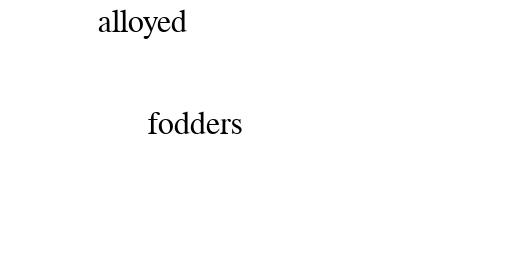

In [16]:
img

In [13]:
img.crop(wordBB)

SystemError: tile cannot extend outside image

<PIL.Image.Image image mode=RGB size=0x0 at 0x7F7CFC6B7BE0>

In [71]:
img = Image.open('/home/sravya/data/muse/mydata/cropped_straight_text/test_0.jpg')

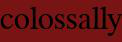

In [72]:
img

In [73]:
img_path ='/home/sravya/data/muse/mydata/cropped_straight_text/test_0.jpg'
raw_pred, sim_pred = infer(img_path)
print('%s => %s' % (raw_pred, sim_pred))

c---o--l-o--s-ssaa-l--l-y- => colossally


In [74]:
img_path ='/home/sravya/data/muse/mydata/cropped_straight_text/test_1.jpg'
raw_pred, sim_pred = infer(img_path)
print('%s => %s' % (raw_pred, sim_pred))

aa--c---r-ii-d---e--ss-t-- => acridest


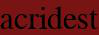

In [75]:
Image.open(img_path)

In [76]:
img_path ='/home/sravya/data/muse/mydata/cropped_straight_text/test_2.jpg'
raw_pred, sim_pred = infer(img_path)
print('%s => %s' % (raw_pred, sim_pred))

c-oo-m--p-le--m--en-t-e-d- => complemented


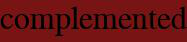

In [77]:
Image.open(img_path)

In [78]:
img_path ='/home/sravya/data/muse/mydata/cropped_straight_text/test_3.jpg'
raw_pred, sim_pred = infer(img_path)
print('%s => %s' % (raw_pred, sim_pred))

f---u--n---g---u---s-i-s-- => fungusis


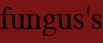

In [79]:
Image.open(img_path)

In [80]:
img_path ='/home/sravya/data/muse/mydata/cropped_straight_text/test_4.jpg'
raw_pred, sim_pred = infer(img_path)
print('%s => %s' % (raw_pred, sim_pred))

aa---c---i--d---ii-f--yy-- => acidify


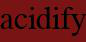

In [81]:
Image.open(img_path)